# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
total_number_of_users = 10_000
total_number_of_ads = 10
all_the_different_ads_that_were_selected_at_different_rounds_by_users = []
alpha_for_each_ad = [0]*10
beta_for_each_ad = [0]*10
total_rewards = 0
for n in range(0,total_number_of_users):
    ad = 0 
    max_random = 0
    for i in range(0, total_number_of_ads):
        random_beta = random.betavariate(alpha_for_each_ad[i]+1, beta_for_each_ad[i]+1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    all_the_different_ads_that_were_selected_at_different_rounds_by_users.append(ad)
    reward = dataset.values[n, ad]
    if (reward == 1):
        alpha_for_each_ad[ad] = alpha_for_each_ad[ad] + 1
    else:
        beta_for_each_ad[ad] = beta_for_each_ad[ad] + 1
    total_rewards = total_rewards + reward
        

In [4]:
print(alpha_for_each_ad)

[3, 16, 3, 7, 2536, 1, 12, 31, 10, 3]


## Visualising the results - Histogram

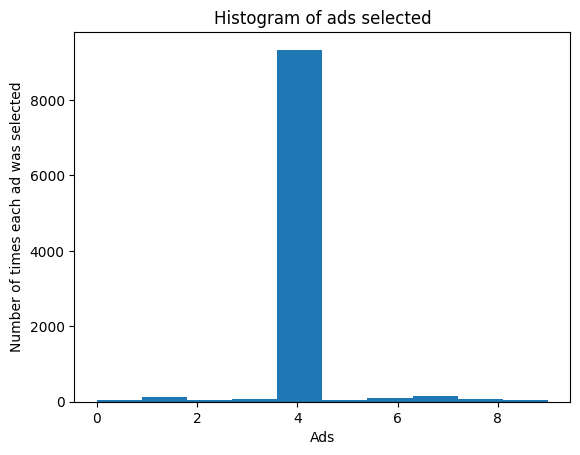

In [5]:
plt.hist(all_the_different_ads_that_were_selected_at_different_rounds_by_users)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()